In [38]:
import altair as alt
alt.renderers.enable('notebook')
import ipywidgets as widgets
from IPython.display import clear_output
from datetime import datetime, timedelta
import pandas as pd

df = pd.read_csv('final_predictions.csv')

def get_games_for_day(df, day):
    dfg = df[df.day==day][['home', 'away', 'Unique_Viewers', 'norm_minutes', 'avg_markup_norm']]
    return dfg

w1 = widgets.Dropdown(
    options=['Unique Viewers', 'Minutes/Viewer', 'Avg Sec Sales Tkt Markup'],
    value='Unique Viewers',
    description='Response Variable',
    disabled=False,
    width=600
)

w2 = widgets.DatePicker(
    description='Date:',
    value = datetime(2018,10,16,0,0,0),
    disabled=False
)

w3 = widgets.Button(description="Plot Values")

out = widgets.Output()

h2 = widgets.HTML(
    value="<h2> NBA Predictions Dashboard </h2>"
)

display(h2)
display(w1)
display(w2)
display(w3)
display(out)
    
def on_button_clicked(b):
    
    day = w2.value.strftime('%Y-%m-%d')
    respVar = w1.value
    
    respDict = {'Unique Viewers': 'Unique_Viewers', 
                'Minutes/Viewer': 'norm_minutes',
                'Avg Sec Sales Tkt Markup': 'avg_markup_norm'}
    
    
    with out:
        clear_output()
        dfg = get_games_for_day(df, day)
        dfg['Home_Away_Teams'] = dfg['home'] + ' vs ' + dfg['away']
        
        p = alt.Chart(dfg).mark_bar().encode(
            x='Home_Away_Teams',
            y=respDict[respVar]
        )
    
        display(p)
    
w3.on_click(on_button_clicked)


HTML(value='<h2> NBA Predictions Dashboard </h2>')

Dropdown(description='Response Variable', options=('Unique Viewers', 'Minutes/Viewer', 'Avg Sec Sales Tkt Mark…

DatePicker(value=datetime.datetime(2018, 10, 16, 0, 0), description='Date:')

Button(description='Plot Values', style=ButtonStyle())

Output()

In [73]:
dfst = pd.read_csv('nba_stock_index.csv')
dfst = dfst.rename(columns={'ym': 'year_month', 'sem2':'social_metric'})
dfst['social_metric'] = dfst['social_metric'].apply(lambda x:round(x,2))


w1 = widgets.Dropdown(
    options=['atlantic', 
             'central',
             'southeast', 
             'southwest',
             'northwest',
             'pacific',
             'eastern', 
             'western'],
    value='western',
    description='Team Group',
    disabled=False,
    width=600
)

w2 = widgets.Button(description="Plot Ticker")

out = widgets.Output()

h2 = widgets.HTML(
    value="<h2> NBA Social Metrics Viewer </h2>"
)

display(h2)
display(w1)
display(w2)
display(out)
    
def on_button_clicked(b):
        
    group = w1.value
    
    if group == 'atlantic':
        team_group = ['BOS', 'BRK', 'NYK', 'PHI', 'TOR']
            
    if group == 'central':
        team_group = ['CHI', 'CLE', 'DET', 'IND', 'MIL']
        
    if group == 'southeast':
        team_group = ['ATL', 'CHA', 'MIA', 'ORL', 'WAS']

    if group == 'southwest':
        team_group = ['DAL', 'HOU', 'MEM', 'NOP', 'SAS']
    
    if group == 'northwest':
        team_group = ['DEN', 'MIN', 'OKC', 'POR', 'UTA']
        
    if group == 'pacific':
        team_group = ['GSW', 'LAC', 'LAL', 'PHX', 'SAC']
        
    if group == 'eastern':
        team_group = atlantic + central + southeast
        
    if group == 'western':
        team_group = southwest + northwest + pacific


    with out:
        clear_output()
        dfst_i = dfst[dfst.team.isin(team_group)]
        
        p = alt.Chart(dfst_i).mark_line(point=True).encode(
                    x='year_month',
                    y='social_metric',
                    color='team',
                    tooltip=['year_month', 'social_metric', 'team']
                    ).interactive()
        display(p)
    
w2.on_click(on_button_clicked)


HTML(value='<h2> NBA Social Metrics Viewer </h2>')

Dropdown(description='Team Group', index=7, options=('atlantic', 'central', 'southeast', 'southwest', 'northwe…

Button(description='Plot Ticker', style=ButtonStyle())

Output()

In [58]:
dfst = pd.read_csv('nba_stock_index.csv')

In [59]:
dfst = dfst.rename(columns={'ym': 'year_month', 'sem2':'social_metric'})

In [60]:
atlantic = ['BOS', 'BRK', 'NYK', 'PHI', 'TOR']
central = ['CHI', 'CLE', 'DET', 'IND', 'MIL']
southeast = ['ATL', 'CHA', 'MIA', 'ORL', 'WAS']

southwest = ['DAL', 'HOU', 'MEM', 'NOP', 'SAS']
northwest = ['DEN', 'MIN', 'OKC', 'POR', 'UTA']
pacific = ['GSW', 'LAC', 'LAL', 'PHX', 'SAC']

eastern = atlantic + central + southeast
western = southwest + northwest + pacific

dfst_atlantic = dfst[dfst.team.isin(atlantic)]

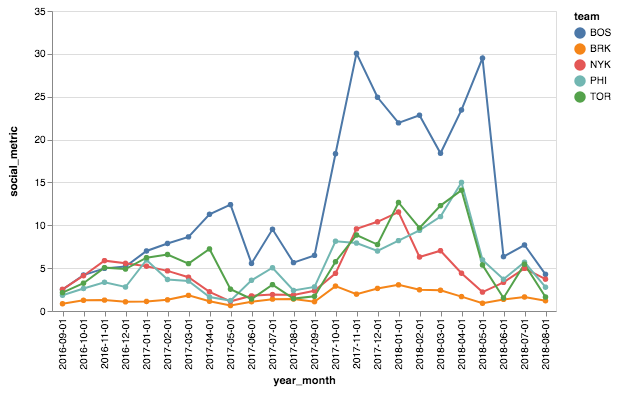

In [61]:
alt.Chart(dfst_atlantic).mark_line(point=True).encode(
    x='year_month',
    y='social_metric',
    color='team',
    tooltip=['year_month', 'social_metric', 'team']
).interactive()